In [1]:
import pandas as pd
import numpy as np
import seaborn as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import models
from keras import layers
from keras.layers import Dense,Dropout
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
sales=pd.read_csv("C:/Users/Anup0/Downloads/advertising.csv")

In [3]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sales.shape


(200, 4)

In [6]:
sales.columns.values.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

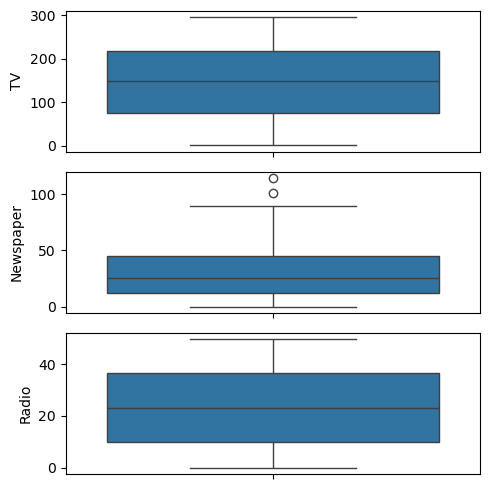

In [9]:
fig, axs=plt.subplots(3, figsize=(5,5))
plt1= sp.boxplot(sales['TV'],ax=axs[0])
plt2= sp.boxplot(sales['Newspaper'],ax=axs[1])
plt3= sp.boxplot(sales['Radio'],ax=axs[2])
plt.tight_layout()

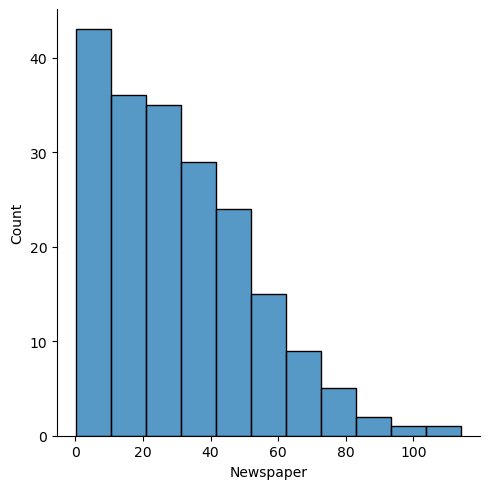

In [10]:
sp.displot(sales['Newspaper'])

In [11]:
iqr=sales.Newspaper.quantile(0.75) - sales.Newspaper.quantile(0.75)

In [12]:
lower_bridge=sales['Newspaper'].quantile(0.25)-(iqr*1.5)
upper_bridge=sales['Newspaper'].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

12.75
45.1


In [13]:
data=sales.copy()

In [14]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

<Axes: ylabel='Newspaper'>

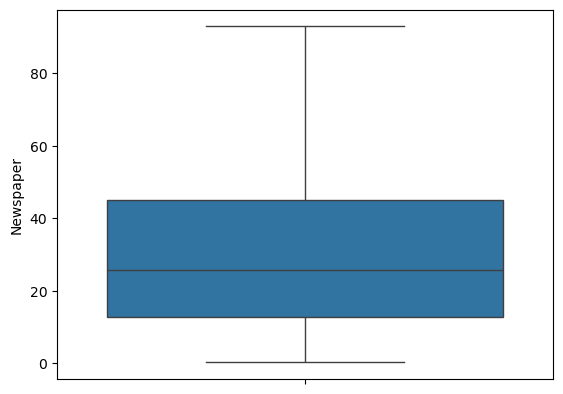

In [15]:
sp.boxplot(data['Newspaper'])

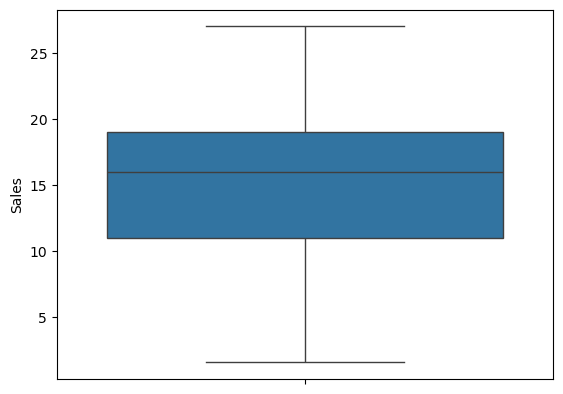

In [16]:
sp.boxplot(data['Sales']);

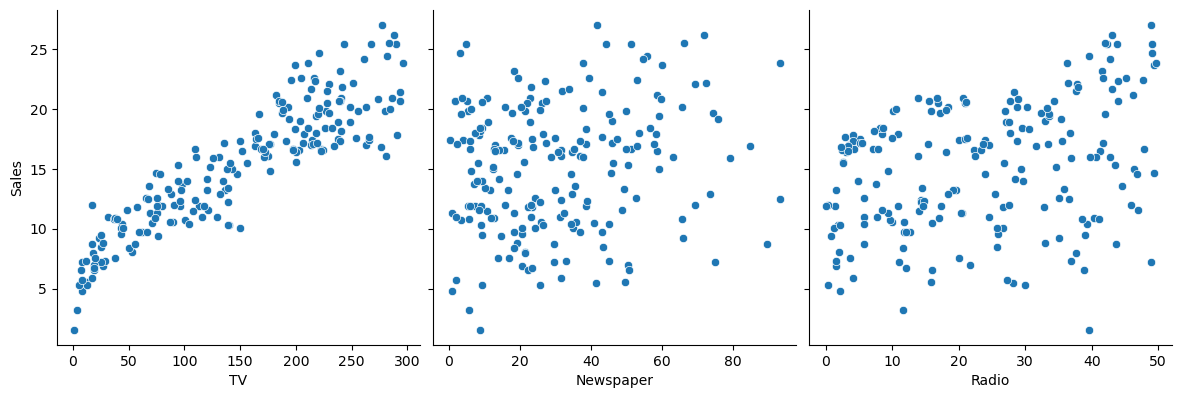

In [17]:
sp.pairplot(data, x_vars=['TV','Newspaper','Radio'],
y_vars='Sales',height=4, aspect=1, kind='scatter')
plt.show()

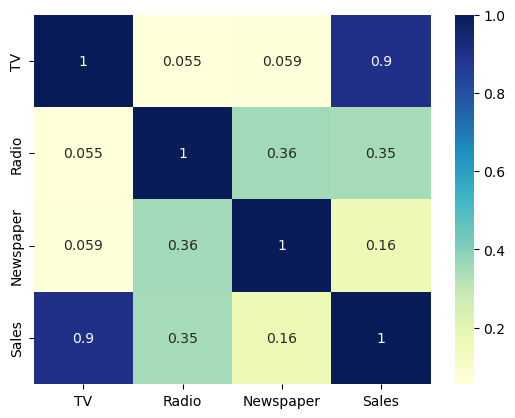

In [18]:
sp.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [19]:
important_features=list(sales.corr()['Sales'][(sales.corr()['Sales']>+0.5)|(sales.corr()['Sales']<-0.5)].index)

In [20]:
print(important_features)

['TV', 'Sales']


In [21]:
x=data['TV']
y=data['Sales']

In [22]:
x=x.values.reshape(-1,1)

In [23]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [24]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [25]:
print(x.shape,y.shape)

(200, 1) (200,)


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3)

In [27]:
print(x_train.shape,y_train.shape)

(140, 1) (140,)


In [28]:
knn=KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [29]:
knn_train_pred=knn.predict(x_train)

In [30]:
knn_test_pred=knn.predict(x_test)

In [31]:
print(knn_train_pred, knn_test_pred)

[17.3  17.6   7.94 14.7  20.9  14.02 11.4   7.94 19.78 22.2  17.74 12.82
 13.2  21.64 18.92 12.98 19.66  7.92 17.5  12.34 10.58 22.2  19.76 21.26
 12.62 13.02 14.7  20.9  17.08 20.14 11.14 19.78 18.34 14.58  8.7   6.84
  9.8  20.3   7.22 20.56  8.32 13.04  6.84 17.5  10.9   8.32 18.26 11.98
 19.76 14.66  9.8  14.66 20.96 22.2  14.8   8.32 14.66 20.74 13.04 12.14
 20.3  18.42 20.9  12.9  18.92 11.98 11.92 20.82 13.02 12.94 12.24 12.14
 19.76  8.7   6.84 19.7  21.34 19.66  6.06 20.1  12.46  9.8   7.92 18.26
 12.62 12.98 11.92 22.94  6.06  4.92  7.92 19.38 14.32 18.26 20.74  9.8
 18.94 22.2  10.58  4.92 20.56 17.   20.96 14.02  7.22 20.34 19.24 14.46
 18.22 17.6  12.98 12.14  6.04 11.4  12.28 17.66  9.68 20.9  20.1  10.9
 19.7  14.8  12.9  19.4  20.14 20.9  21.96  6.06 12.24 12.28 20.94 12.24
 15.26 11.14 20.34 12.14 19.52 17.42 20.96 20.82] [10.9  20.96 13.04 20.94 17.64  9.68 20.94 10.64 10.24 13.52 21.34 17.
 18.34 12.98  4.92  9.68 11.14 11.14 20.74 22.2   8.32 12.14  9.8   9.68
  6.8

In [32]:
Results=pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [33]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance=r2_train - r2
Results=({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2, "Test RMSE":rmse,"Variance":variance},ignore_index:=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.8076948104301679
RMSE: 2.287831578882793


In [34]:
Results

({'Model': 'K-Nearest Neighbors',
  'Train R2': 0.8566739686072012,
  'Test R2': 0.8076948104301679,
  'Test RMSE': 2.287831578882793,
  'Variance': 0.048979158177033355},
 True)

In [35]:
svr=SVR().fit(x_train, y_train)
svr

SVR()

In [36]:
svr_train_pred=svr.predict(x_train)
svr_test_pred=svr.predict(x_test)

In [37]:
print(svr_train_pred, svr_test_pred)

[17.2814763  16.48779217  8.36834604 15.57431793 20.03496673 14.02674815
 11.66877567  8.32971098 19.52277644 19.58135866 19.6987582  14.90006045
 13.78238771 19.75631128 19.59350873 13.48159978 20.09983599  7.8720387
 16.42451049 15.03258322 10.5357778  19.48246679 18.96898892 19.39537082
 12.7760758  12.86952421 15.43265417 20.08985226 17.19942832 20.11480805
 11.18659729 19.50529927 19.76873009 14.26066927  8.60072154  7.93815727
  9.72746419 19.15022429  7.72652033 18.28814581  8.17168011 14.00214511
  7.93389744 16.41187074 11.1056184   8.26499725 18.62050418 11.61181127
 18.25986279 14.70566628  9.36091817 14.53709294 20.01244765 19.38348608
 15.58026774  8.23338091 14.56841156 20.00951695 13.98740484 12.37614747
 19.09730035 19.80006067 20.07899699 15.08850396 19.59350873 11.59908711
 11.78124577 19.77406417 12.85404047 13.13288053 14.97154875 12.22876325
 18.97368535  8.43032809  7.96406711 17.95168661 19.26462136 20.09753221
  7.59155973 19.8673923  11.58633928  9.47266023  7.

In [38]:
r2=r2_score(y_test,svr_test_pred)
r2_train=r2_score(y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance=r2_train - r2
Results2=({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2, "Test RMSE":rmse,"Variance":variance},ignore_index:=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.8108681530845614
RMSE: 2.2688766199750123


In [39]:
Results2

({'Model': 'Support Vector Machine',
  'Train R2': 0.8059021899323762,
  'Test R2': 0.8108681530845614,
  'Test RMSE': 2.2688766199750123,
  'Variance': -0.0049659631521852265},
 True)

In [40]:
Results, Results2

(({'Model': 'K-Nearest Neighbors',
   'Train R2': 0.8566739686072012,
   'Test R2': 0.8076948104301679,
   'Test RMSE': 2.287831578882793,
   'Variance': 0.048979158177033355},
  True),
 ({'Model': 'Support Vector Machine',
   'Train R2': 0.8059021899323762,
   'Test R2': 0.8108681530845614,
   'Test RMSE': 2.2688766199750123,
   'Variance': -0.0049659631521852265},
  True))

In [41]:
x_train_constant=sm.add_constant(x_train)

In [42]:
model=sm.OLS(y_train, x_train_constant).fit()

In [43]:
model.params

const    6.930467
x1       0.055413
dtype: float64

In [44]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     569.8
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           7.68e-51
Time:                        23:16:06   Log-Likelihood:                -317.46
No. Observations:                 140   AIC:                             638.9
Df Residuals:                     138   BIC:                             644.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9305      0.394     17.587      0.0

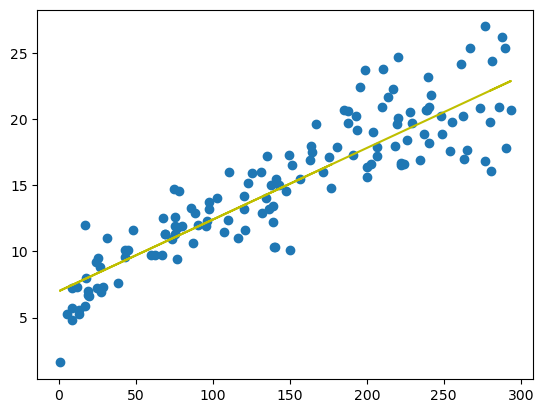

In [45]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955+0.0541*x_train,'y')
plt.show()

In [46]:
y_train_pred=model.predict(x_train_constant)
res=(y_train - y_train_pred)
res

197   -1.938504
171    1.454154
76    -1.554314
194    2.074261
36     3.679900
         ...   
125   -1.162449
142    0.951046
14     0.759813
111    1.476298
102   -2.657089
Name: Sales, Length: 140, dtype: float64

In [47]:
y_train_pred

array([16.73850414, 16.04584614,  8.45431447, 15.22573907, 21.72010046,
       13.6353963 , 11.16399256,  8.41552563, 19.13787144, 22.8671421 ,
       19.44264096, 14.57186992, 13.3583331 , 22.52358374, 19.25423799,
       13.01477474, 20.71713168,  7.88356428, 15.9904335 , 14.70486025,
       10.23306021, 23.03892129, 18.3898008 , 18.9439272 , 12.23345651,
       12.33319927, 15.09274873, 21.40978968, 16.6664677 , 20.99419488,
       10.75393903, 19.11016512, 19.58117256, 13.89583571,  8.67596503,
        7.97222451,  9.60689738, 18.61145136,  7.66191372, 17.66389522,
        8.24928771, 13.60768998,  7.96668324, 15.97935097, 10.68744386,
        8.34903046, 18.00191232, 11.11412119, 17.6361889 , 14.37238441,
        9.31875166, 14.19506397, 20.23504171, 23.19961794, 15.23128033,
        8.31578288, 14.22831155, 20.22395918, 13.59106619, 11.82340298,
       18.54495619, 19.64766773, 21.48736737, 14.76027289, 19.25423799,
       11.10303866, 11.26373532, 22.48479489, 12.31657547, 12.62

In [48]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     569.8
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           7.68e-51
Time:                        23:16:06   Log-Likelihood:                -317.46
No. Observations:                 140   AIC:                             638.9
Df Residuals:                     138   BIC:                             644.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9305      0.394     17.587      0.0

<Figure size 640x480 with 0 Axes>

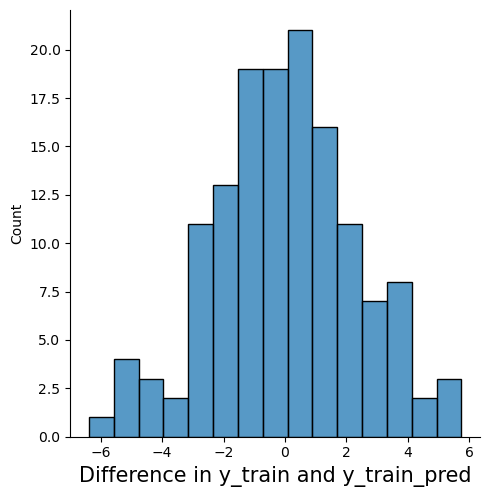

In [49]:
fig=plt.figure()
sp.displot(res, bins=15)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize=15)
plt.show()

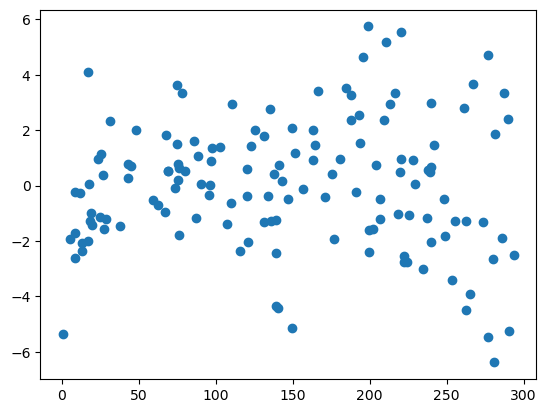

In [50]:
plt.scatter(x_train,res)
plt.show()

In [51]:
x_test_constant=sm.add_constant(x_test)
y_pred=model.predict(x_test_constant)

In [52]:
y_pred

array([10.59324237, 20.40682089, 13.42482827, 19.03812869, 16.36169818,
        8.97519329, 18.99379858, 10.11669367,  9.89504311, 12.72662901,
       18.82756066, 16.48914726, 19.52021866, 13.01477474,  7.1576587 ,
        9.03614719, 10.72069145, 10.84259925, 20.21841792, 23.1608291 ,
        8.32132414, 11.90098067,  9.39632935,  9.11926615,  8.01655462,
       19.68091531, 21.64806403, 12.49389592, 23.35477334, 19.79174059,
       16.26195543, 20.08542758, 18.29005805, 17.17626399, 12.15033755,
       18.75552423, 18.6059101 , 18.92176215, 16.63322012, 20.83349822,
        7.86694049, 12.13371376, 14.10086248, 17.04881492,  9.70109887,
       17.96312348, 16.73850414, 11.1584513 , 22.64549155, 18.86634951,
        7.33497915, 19.56454877,  7.36268547, 16.10680004, 10.04465724,
       17.88000452, 17.37020823, 13.18655392, 17.88000452, 22.68428039])

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.159552489846813